In [1]:
from sklearn.datasets import fetch_openml #Loading the MNIST data
mnist = fetch_openml('mnist_784', version = 1)

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist['data'] , mnist['target']
print("Data shape : ", X.shape) #There are 70,000 images and each image has 784 features(28 X 28 pixels)
print("Target Shape: ", y.shape)

Data shape :  (70000, 784)
Target Shape:  (70000,)


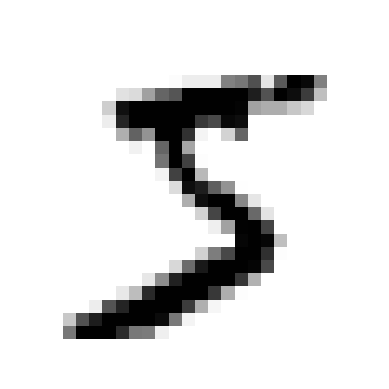

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

example_digit = X.iloc[0]
ex_digit_img_ = example_digit.values.reshape(28,28)
plt.imshow(ex_digit_img_, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [8]:
y[0]

'5'

In [10]:
#The output of y is a string so we are casting the string into integers
y = y.astype(np.uint8)

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] #Splitting the data into test and train set , since it is already predefined in the dataset.

## Training a Binary Classifier

In [13]:
# A binary classifier of 5 out of 0-9 digits
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [14]:
# Creating a SGDClassifier and training it
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [15]:
#Example data test
sgd_clf.predict([example_digit])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Performance analysis using Confusion matrix

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [17]:
# THe confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [18]:
#Precision and recall
from sklearn.metrics import precision_score, recall_score
print("Precision score: " ,precision_score(y_train_5, y_train_pred))
print("Recall score: " ,recall_score(y_train_5, y_train_pred))

Precision score:  0.8370879772350012
Recall score:  0.6511713705958311


In [19]:
from sklearn.metrics import f1_score
print("F1 Score: " , f1_score(y_train_5, y_train_pred))

F1 Score:  0.7325171197343847


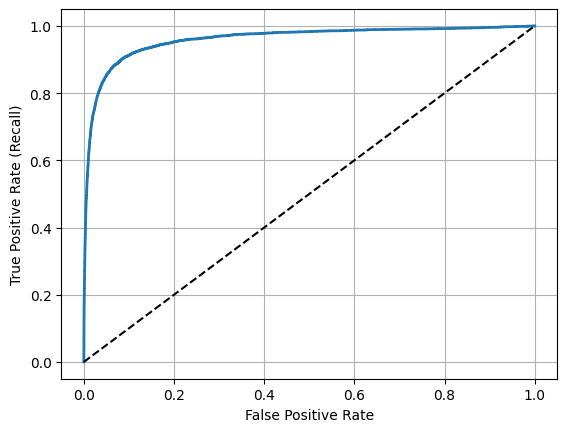

In [21]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate (Recall)')
  plt.grid(True)

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
plot_roc_curve(fpr, tpr)
plt.show()